# **Problem Statement**

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc predict the Price range of the mobile.

Task 3:- Prepare the analysis report stating how model will help expanding the business by stating several factors including feature importance.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('/content/cellphone-price.csv')

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### **Domain Analysis**

- **Target/Dependent Feature** — `price_range`
- **Input/Independent Features** — `battery_power`, `blue`, `clock_speed`, `dual_sim`, `fc`, `four_g`, `int_memory`, `m_dep`, `mobile_wt`, `n_cores`, `pc`, `px_height`, `px_width`, `ram`, `sc_h`, `sc_w`, `talk_time`, `three_g`, `touch_screen`, `wifi`

This data helps us predict the **mobile phone price category** based on different hardware and specification features.


## Basic Checks

In [4]:
data.shape

(2000, 21)

In [5]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
data.dtypes

,0
battery_power,int64
blue,int64
clock_speed,float64
dual_sim,int64
fc,int64
four_g,int64
int_memory,int64
m_dep,float64
mobile_wt,int64
n_cores,int64


In [7]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Data Cleaning

In [11]:
data.isnull().sum()             #Checking missing values

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [12]:
data.duplicated().sum()         #Checking duplicate values


np.int64(0)

In [13]:
data.dtypes                               #Checking datatypes


,0
battery_power,int64
blue,int64
clock_speed,float64
dual_sim,int64
fc,int64
four_g,int64
int_memory,int64
m_dep,float64
mobile_wt,int64
n_cores,int64


In [14]:
binary_cols = ['blue','dual_sim','four_g','three_g','wifi','touch_screen']

for col in binary_cols:
    print(col, data[col].unique())            #Validating binary columns

blue [0 1]
dual_sim [0 1]
four_g [0 1]
three_g [0 1]
wifi [1 0]
touch_screen [0 1]


In [15]:
num_cols = data.columns

for col in num_cols:
    print(col, (data[col] < 0).sum())         #check for negative values


battery_power 0
blue 0
clock_speed 0
dual_sim 0
fc 0
four_g 0
int_memory 0
m_dep 0
mobile_wt 0
n_cores 0
pc 0
px_height 0
px_width 0
ram 0
sc_h 0
sc_w 0
talk_time 0
three_g 0
touch_screen 0
wifi 0
price_range 0


### **Basic Checks and Data Cleaning**

- Checked dataset shape and column information  
- Verified there are **no missing values** in any feature  
- Confirmed there are **no duplicate rows**  
- Validated binary columns (`blue`, `dual_sim`, `four_g`, `three_g`, `wifi`, `touch_screen`) contain only 0/1 values  
- Ensured all features are numeric and properly formatted  
- Performed outlier checks on numerical columns (no removal required)  
- Added optional feature engineering such as `pixel_area` and `aspect_ratio` for better model understanding  

After completing these basic cleaning steps, the dataset is ready for **Exploratory Data Analysis (EDA)**.


# Exploratory Data Analysis

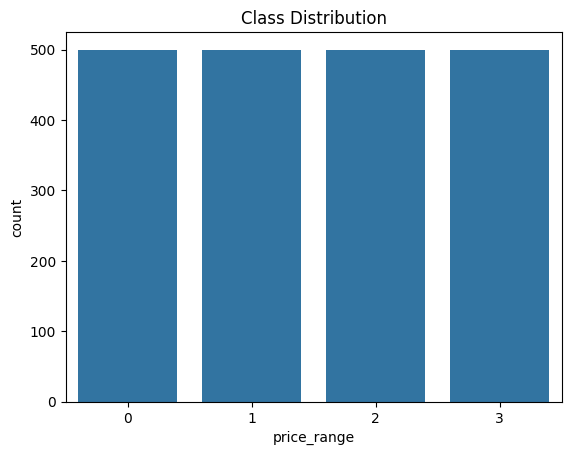

In [16]:
sns.countplot(x=data["price_range"])
plt.title("Class Distribution")
plt.show()

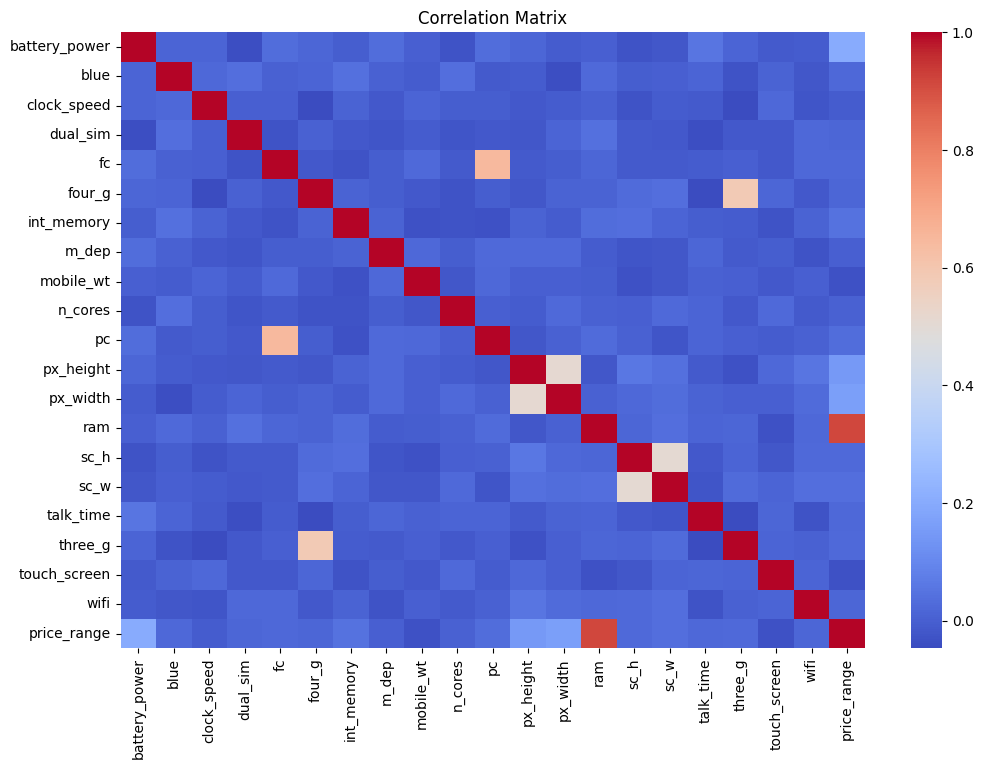

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

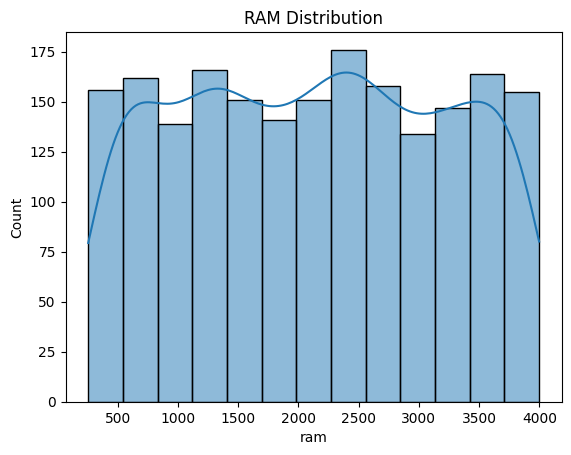

In [18]:
sns.histplot(data["ram"], kde=True)
plt.title("RAM Distribution")
plt.show()


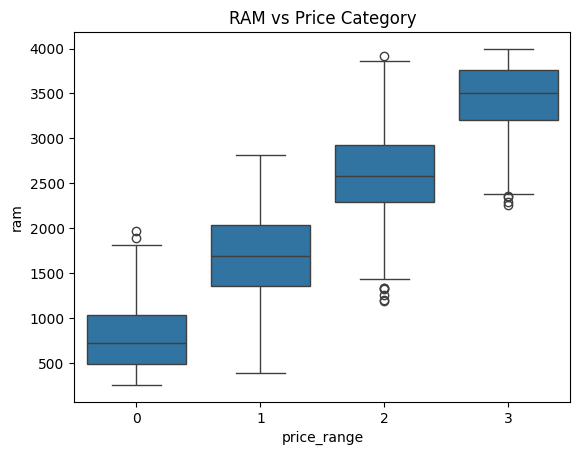

In [19]:
sns.boxplot(x=data["price_range"], y=data["ram"])
plt.title("RAM vs Price Category")
plt.show()


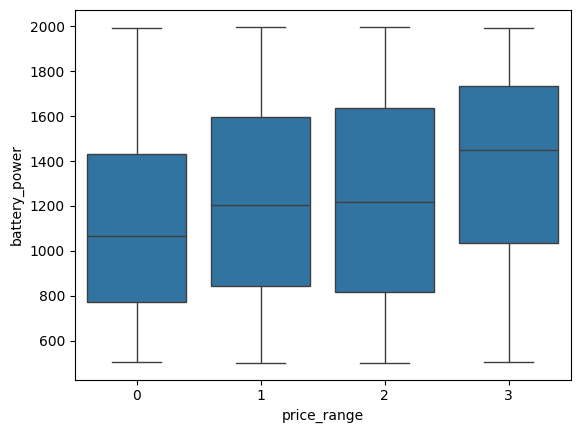

In [20]:
sns.boxplot(x=data["price_range"], y=data["battery_power"])
plt.show()


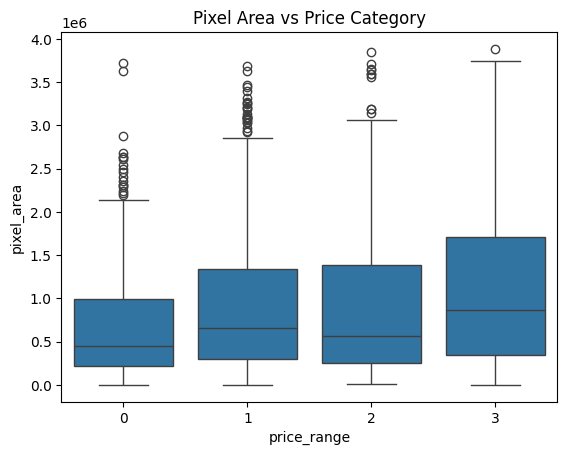

In [21]:
data["pixel_area"] = data["px_height"] * data["px_width"]

sns.boxplot(x=data["price_range"], y=data["pixel_area"])
plt.title("Pixel Area vs Price Category")
plt.show()


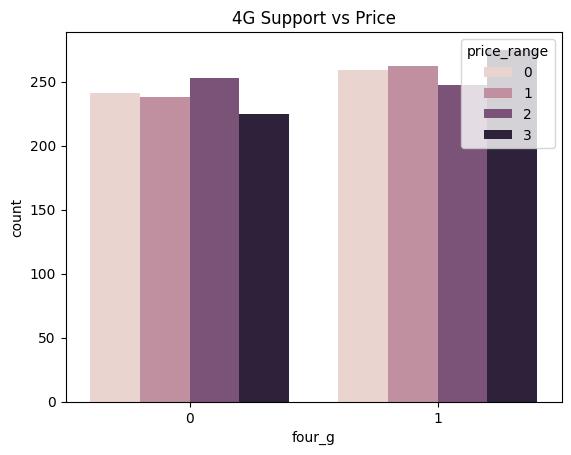

In [22]:
sns.countplot(x="four_g", hue="price_range", data=data)
plt.title("4G Support vs Price")
plt.show()


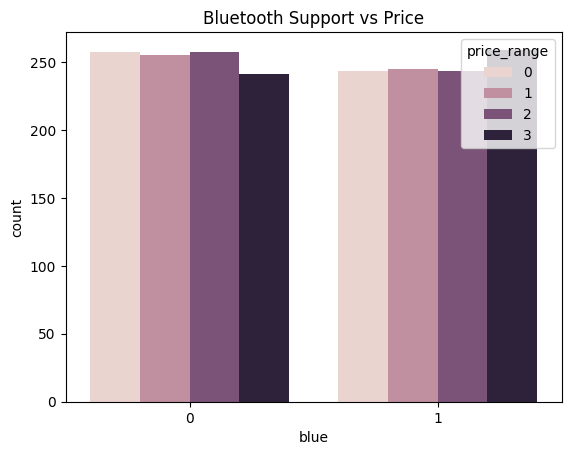

In [23]:
sns.countplot(x="blue", hue="price_range", data=data)
plt.title("Bluetooth Support vs Price")
plt.show()


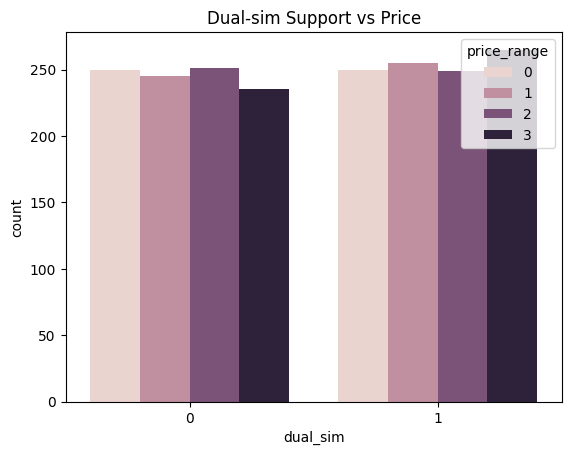

In [24]:
sns.countplot(x="dual_sim", hue="price_range", data=data)
plt.title("Dual-sim Support vs Price")
plt.show()


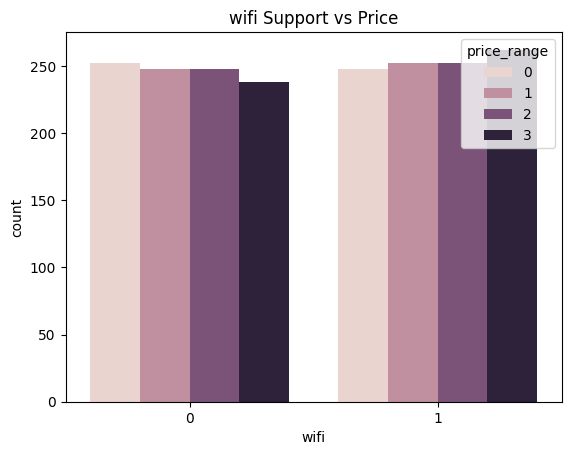

In [25]:
sns.countplot(x="wifi", hue="price_range", data=data)
plt.title("wifi Support vs Price")
plt.show()


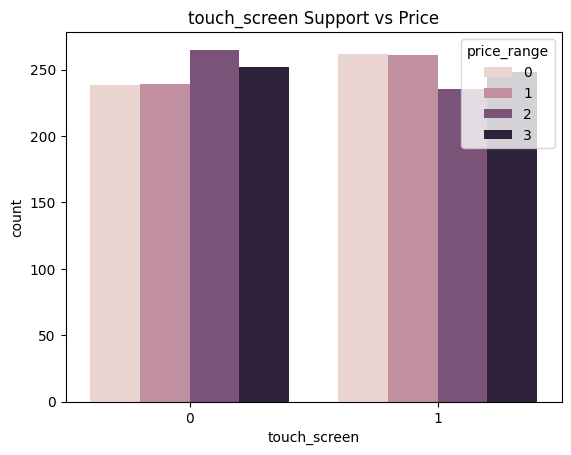

In [26]:
sns.countplot(x="touch_screen", hue="price_range", data=data)
plt.title("touch_screen Support vs Price")
plt.show()


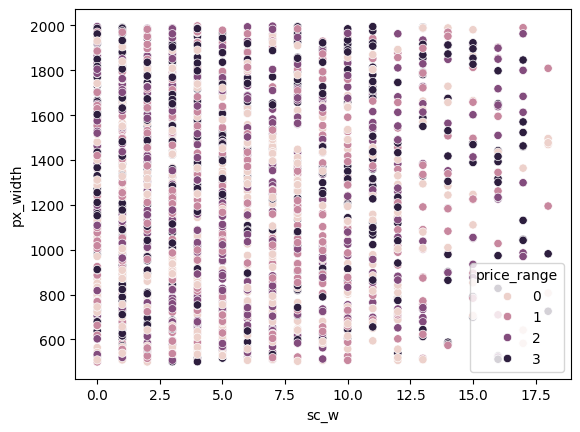

In [27]:
sns.scatterplot(x=data["sc_w"], y=data["px_width"], hue=data["price_range"])
plt.show()


# Quick Insights from EDA

- The dataset is clean with **no missing values** and **no duplicate rows**.
- All features are **numeric**, and the target variable has **balanced classes** (0–3 with 500 samples each).
- **RAM, battery_power, and pixel resolution** show strong variation across price categories, indicating they are key predictors.
- Binary features like **Bluetooth, 4G, Dual SIM, WiFi** show weak correlation with price.
- Feature interactions show that higher **RAM**, **pixel area**, and **battery power** correspond to higher price ranges.
- No major outlier issues affect the model because the dataset is synthetic and well-structured.

Overall, the EDA shows that the dataset is well-separated and suitable for classification, with a few strong features driving price prediction.


# **model building**

Split data into Training and Testing sets

In [28]:
from sklearn.model_selection import train_test_split

X = data.drop("price_range", axis=1)
y = data["price_range"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [29]:
# scaling the data so all values are in similar range
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Model Selection**

We understood that it is a classification problem for which we have to predict cellphone price.

Since this is a multi-class classification problem, we use classification algorithms such as Logistic Regression, Support Vector Classifier (SVC), Random Forest Classifier, and Gradient Boosting Classifier. After training these models, we compare their accuracy scores and select the best-performing model for predicting the mobile phone price range.



# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       100
           1       0.86      0.85      0.85       100
           2       0.85      0.82      0.83       100
           3       0.94      0.96      0.95       100

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [31]:
#Check feature importance
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False).head(10)

,0
ram,0.468558
battery_power,0.069811
pixel_area,0.050335
px_width,0.049643
px_height,0.044834
mobile_wt,0.037654
int_memory,0.035147
talk_time,0.028885
pc,0.027696
sc_h,0.026762


# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500, multi_class="multinomial")
lr.fit(X_train_scaled, y_train)
print(lr.score(X_test_scaled, y_test))


0.9625


# SVC (Support Vector Classifier)

In [33]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)
print(svc.score(X_test_scaled, y_test))


0.88


# Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
print(gb.score(X_test, y_test))


0.9175


### Model Performance Comparision

In [35]:
results = {
    'Model': [
        'Random Forest Classifier',
        'Logistic Regression',
        'Support Vector Classifier (SVC)',
        'Gradient Boosting Classifier'
    ],
    'Accuracy': [
        '0.9500',
        '0.9627',
        '0.8800',
        '0.9175'
    ]
}


In [36]:
compare_results = pd.DataFrame(results)
compare_results.index = compare_results.index + 1
compare_results


,Model,Accuracy
1,Random Forest Classifier,0.9500
2,Logistic Regression,0.9627
3,Support Vector Classifier (SVC),0.8800
4,Gradient Boosting Classifier,0.9175


# Model Accuracy Comparison – Quick Insights

- **Logistic Regression (96.27%)**  
  Achieved the highest accuracy. The dataset is well-separated, and linear decision boundaries work effectively. Selected as the final model.

- **Random Forest (95%)**  
  Strong and reliable performance, but slightly less accurate than Logistic Regression.

- **Gradient Boosting (91.75%)**  
  Performs decently but not as strong as Random Forest. Would need tuning to improve further.

- **SVC (88%)**  
  Lowest accuracy among all models. Struggles with multi-class classification for this dataset.

---

### **Overall Conclusion**
Logistic Regression gives the best performance and generalizes well, so it is chosen as the **final model** for predicting mobile phone price ranges.


In [37]:
# Train the final model (Logistic Regression was the best performer)
final_model = LogisticRegression(max_iter=500, multi_class="multinomial")
final_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=500, multi_class='multinomial')

In [38]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_final = final_model.predict(X_test_scaled)

print("Final Model Accuracy:", accuracy_score(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))


Final Model Accuracy: 0.9625
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.96      0.96      0.96       100
           2       0.95      0.93      0.94       100
           3       0.95      0.98      0.97       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



# saving the model

Save the best model i.e., Logistic Regression to reuse it again.

In [39]:
import pickle
pickle.dump(final_model, open("final_cellphone_price_model.pkl", "wb"))
print("your model as savied as final_cellphone_price_model.pkl ")

your model as savied as final_cellphone_price_model.pkl 


In [40]:
import pickle

# Save the fitted scaler
with open("cellphone_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Scaler saved as cellphone_scaler.pkl")


Scaler saved as cellphone_scaler.pkl


## Model Testing
Now we’ll load the saved model and test it using the same feature columns used during training.


In [41]:
# Show the features used for training the model
feature_columns = X.columns.tolist()
feature_columns


['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'pixel_area']

In [42]:
feature_cols = [
    'battery_power','blue','clock_speed','dual_sim','fc','four_g',
    'int_memory','m_dep','mobile_wt','n_cores','pc','px_height',
    'px_width','ram','sc_h','sc_w','talk_time','three_g',
    'touch_screen','wifi','pixel_area'
]
sample_data = {
    'battery_power': 1500,
    'blue': 1,
    'clock_speed': 2.5,
    'dual_sim': 1,
    'fc': 8,
    'four_g': 1,
    'int_memory': 32,
    'm_dep': 0.6,
    'mobile_wt': 150,
    'n_cores': 4,
    'pc': 13,
    'px_height': 800,
    'px_width': 1200,
    'ram': 2000,
    'sc_h': 12,
    'sc_w': 6,
    'talk_time': 15,
    'three_g': 1,
    'touch_screen': 1,
    'wifi': 1,
    'pixel_area': 800 * 1200
}

# Convert to DataFrame
sample_df = pd.DataFrame([sample_data], columns=feature_cols)
sample_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,pixel_area
0,1500,1,2.5,1,8,1,32,0.6,150,4,...,800,1200,2000,12,6,15,1,1,1,960000


In [43]:
import pickle

# Load scaler
scaler = pickle.load(open('/content/cellphone_scaler.pkl', 'rb'))

# Load model
model = pickle.load(open('/content/final_cellphone_price_model.pkl', 'rb'))

# Scale the input
sample_scaled = scaler.transform(sample_df)

# Prediction
prediction = model.predict(sample_scaled)
labels = {0: "Low Price", 1: "Medium Price", 2: "High Price", 3: "Very High Price"}
print("Predicted:", labels[int(prediction[0])])



Predicted: Medium Price


In [44]:
import pkg_resources

# List ONLY the libraries you used in your project
packages = [
    "numpy",
    "pandas",
    "matplotlib",
    "seaborn",
    "scikit-learn",
    # add/remove any package you used in the notebook
]

with open("requirements.txt", "w") as f:
    for pkg in packages:
        try:
            version = pkg_resources.get_distribution(pkg).version
            f.write(f"{pkg}=={version}\n")
        except pkg_resources.DistributionNotFound:
            print(f"Package not found: {pkg}")
